### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()
# Target: IS_SUCCESSFUL
# Features: APPLICATION_TYPE, AFFILIATION, CLASSIFICATION,
#           USE_CASE, ORGANIZATION, STATUS, INCOME_AMT,
#           SPECIAL_CONSIDERATIONS, ASK_AMT

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

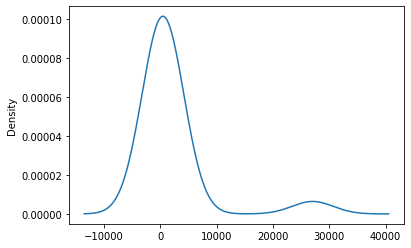

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than 500
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")
    
# Check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C5200        1
C2170        1
C1820        1
C4200        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

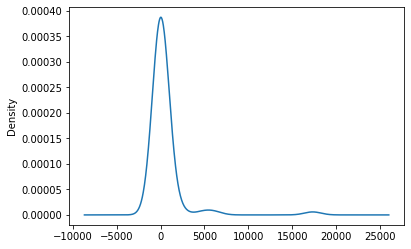

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than 1800?
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")
    
# Check to make sure binning was successful
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)
print("Feature Training Shape:", X_train.shape)
print("Feature Testing Shape:", X_test.shape)
print("Target Training Shape:", y_train.shape)
print("Target Testing Shape:", y_test.shape)

Feature Shape: (34299, 43)
Target Shape: (34299, 1)
Feature Training Shape: (25724, 43)
Feature Testing Shape: (8575, 43)
Target Training Shape: (25724, 1)
Target Testing Shape: (8575, 1)


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# number of layer1 neurons = 2*(number of inputs=43) = 86 ~ 80
hidden_nodes_layer1 = 80
# number of layer2 neurons: Between (input=80) and (output=1 - classifier)
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  # binary clasifier -> 1 output neuron/sigmoid activation

# Check the structure of the model
nn.summary()
# 1st Hidden Layer: 3520 params = [43 inputs (from input layer) * 80 neurons] + (80 bias terms)
# 2nd Hidden Layer: 2430 params = [80 inputs (from 1st hidden layer) * 30 neurons] + (30 bias terms)
# Output Layer: 31 params = [30 inputs (from 2nd hidden layer) * 1 neuron] + (1 bias term)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Add model weight checkpoints during training
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path="checkpoints/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 642us/step - loss: 0.5899 - accuracy: 0.7032
Epoch 2/100
804/804 [==============================] - 1s 651us/step - loss: 0.5602 - accuracy: 0.7261
Epoch 3/100
804/804 [==============================] - 1s 644us/step - loss: 0.5573 - accuracy: 0.7205
Epoch 4/100
804/804 [==============================] - 1s 654us/step - loss: 0.5460 - accuracy: 0.7328
Epoch 5/100
804/804 [==============================] - 1s 641us/step - loss: 0.5539 - accuracy: 0.7266

Epoch 00005: saving model to checkpoints/weights.5.hdf5
Epoch 6/100
804/804 [==============================] - 1s 632us/step - loss: 0.5539 - accuracy: 0.7248
Epoch 7/100
804/804 [==============================] - 1s 625us/step - loss: 0.5481 - accuracy: 0.7312
Epoch 8/100
804/804 [==============================] - 1s 625us/step - loss: 0.5486 - accuracy: 0.7268
Epoch 9/100
804/804 [==============================] - 1s 626us/step - loss: 0.5449 - accuracy: 0.7316
Epoch 10/100
804

804/804 [==============================] - 1s 650us/step - loss: 0.5319 - accuracy: 0.7380
Epoch 73/100
804/804 [==============================] - 1s 647us/step - loss: 0.5369 - accuracy: 0.7374
Epoch 74/100
804/804 [==============================] - 1s 644us/step - loss: 0.5363 - accuracy: 0.7365
Epoch 75/100
804/804 [==============================] - 1s 625us/step - loss: 0.5346 - accuracy: 0.7379

Epoch 00075: saving model to checkpoints/weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 1s 630us/step - loss: 0.5369 - accuracy: 0.7398
Epoch 77/100
804/804 [==============================] - 1s 634us/step - loss: 0.5352 - accuracy: 0.7376
Epoch 78/100
804/804 [==============================] - 1s 633us/step - loss: 0.5363 - accuracy: 0.7348
Epoch 79/100
804/804 [==============================] - 1s 631us/step - loss: 0.5339 - accuracy: 0.7403
Epoch 80/100
804/804 [==============================] - 1s 631us/step - loss: 0.5323 - accuracy: 0.7416

Epoch 00080: savin

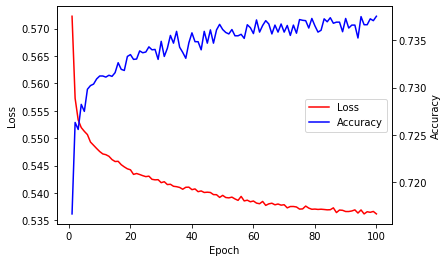

In [21]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history,
                          index=range(1, len(fit_model.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5552 - accuracy: 0.7364
Loss: 0.5551819801330566, Accuracy: 0.7364431619644165


In [23]:
# Export and save model to HDF5 file
nn.save("trained_application.h5")

In [24]:
# Model Optimization:
# Increasing number of epochs
fit_model_inc_epochs = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 626us/step - loss: 0.5363 - accuracy: 0.7365
Epoch 2/200
804/804 [==============================] - 1s 627us/step - loss: 0.5361 - accuracy: 0.7366
Epoch 3/200
804/804 [==============================] - 1s 627us/step - loss: 0.5365 - accuracy: 0.7357
Epoch 4/200
804/804 [==============================] - 1s 635us/step - loss: 0.5360 - accuracy: 0.7373
Epoch 5/200
804/804 [==============================] - 1s 623us/step - loss: 0.5360 - accuracy: 0.7364
Epoch 6/200
804/804 [==============================] - 1s 637us/step - loss: 0.5363 - accuracy: 0.7377
Epoch 7/200
804/804 [==============================] - 1s 627us/step - loss: 0.5359 - accuracy: 0.7374
Epoch 8/200
804/804 [==============================] - 1s 632us/step - loss: 0.5357 - accuracy: 0.7365
Epoch 9/200
804/804 [==============================] - 1s 626us/step - loss: 0.5359 - accuracy: 0.7375
Epoch 10/200
804/804 [==============================] - 1s 624us/step - l

804/804 [==============================] - 1s 625us/step - loss: 0.5334 - accuracy: 0.7385
Epoch 158/200
804/804 [==============================] - 1s 625us/step - loss: 0.5328 - accuracy: 0.7388
Epoch 159/200
804/804 [==============================] - 1s 638us/step - loss: 0.5339 - accuracy: 0.7388
Epoch 160/200
804/804 [==============================] - 1s 629us/step - loss: 0.5332 - accuracy: 0.7378
Epoch 161/200
804/804 [==============================] - 1s 624us/step - loss: 0.5330 - accuracy: 0.7382
Epoch 162/200
804/804 [==============================] - 1s 627us/step - loss: 0.5331 - accuracy: 0.7383
Epoch 163/200
804/804 [==============================] - 1s 625us/step - loss: 0.5329 - accuracy: 0.7389
Epoch 164/200
804/804 [==============================] - 1s 631us/step - loss: 0.5332 - accuracy: 0.7381
Epoch 165/200
804/804 [==============================] - 1s 628us/step - loss: 0.5331 - accuracy: 0.7379
Epoch 166/200
804/804 [==============================] - 1s 628us/ste

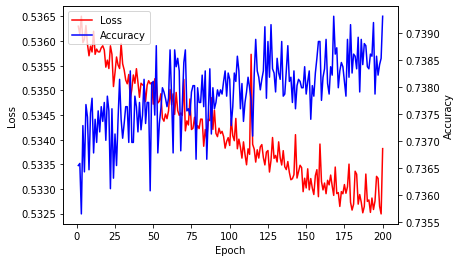

In [25]:
history_df = pd.DataFrame(fit_model_inc_epochs.history,
                          index=range(1, len(fit_model_inc_epochs.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="upper left")

plt.show()

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5769 - accuracy: 0.7361
Loss: 0.5768591165542603, Accuracy: 0.736093282699585


In [29]:
# Changing Activation Function: try tanh to handle negative inputs in X_train_scaled
nn_tanh = tf.keras.models.Sequential()

# First hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn_tanh.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  # binary clasifier -> 1 output neuron/sigmoid activation

# Check the structure of the model
nn_tanh.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn_tanh.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
fit_model_tanh = nn_tanh.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 646us/step - loss: 0.5892 - accuracy: 0.7040
Epoch 2/100
804/804 [==============================] - 1s 659us/step - loss: 0.5557 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 1s 673us/step - loss: 0.5561 - accuracy: 0.7254
Epoch 4/100
804/804 [==============================] - 1s 643us/step - loss: 0.5500 - accuracy: 0.7307
Epoch 5/100
804/804 [==============================] - 1s 664us/step - loss: 0.5481 - accuracy: 0.7315
Epoch 6/100
804/804 [==============================] - 1s 673us/step - loss: 0.5505 - accuracy: 0.7286
Epoch 7/100
804/804 [==============================] - 1s 658us/step - loss: 0.5434 - accuracy: 0.7325
Epoch 8/100
804/804 [==============================] - 1s 659us/step - loss: 0.5463 - accuracy: 0.7299
Epoch 9/100
804/804 [==============================] - 1s 653us/step - loss: 0.5497 - accuracy: 0.7297
Epoch 10/100
804/804 [==============================] - 1s 737us/step - l

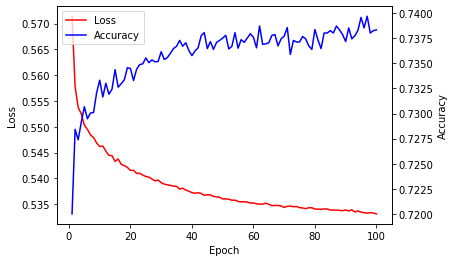

In [33]:
history_df = pd.DataFrame(fit_model_tanh.history,
                          index=range(1, len(fit_model_tanh.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="upper left")

plt.show()

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_tanh.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5532 - accuracy: 0.7369
Loss: 0.5531788468360901, Accuracy: 0.7369096279144287


In [73]:
# Reducing Number of Input Features
# "SPECIAL_CONSIDERATIONS_N" and "SPECIAL_CONSIDERATIONS_Y" are dedundant, drop "SPECIAL_CONSIDERATIONS_N"
# Bin "INCOME_AMT"
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [74]:
# Drop non-essential columns
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

# Bin "APPLICATION_TYPE"
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")

# Bin "CLASSIFICATION"
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

In [75]:
# Look at INCOME_AMT value counts for binning
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [76]:
# Determine which values to replace if counts are less than 3000
replace_income = list(income_counts[income_counts < 3000].index)

# Replace in dataframe
for income in replace_income:
    application_df["INCOME_AMT"] = application_df["INCOME_AMT"].replace(income, "Other")
    
# Check to make sure binning was successful
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [69]:
# Look at AFFILIATION value counts for binning
aff_counts = application_df["AFFILIATION"].value_counts()
aff_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [71]:
# Determine which values to replace if counts are less than 15000
replace_aff = list(aff_counts[aff_counts < 15000].index)

# Replace in dataframe
for aff in replace_aff:
    application_df["AFFILIATION"] = application_df["AFFILIATION"].replace(aff, "Other")
    
# Check to make sure binning was successful
application_df["AFFILIATION"].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [72]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_25000-99999',
       'INCOME_AMT_Other', 'SPECIAL_CONSIDERATIONS_N',
       'SPEC

In [42]:
# Drop "SPECIAL_CONSIDERATION_N":
application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [43]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# number of layer1 neurons = 2*(number of inputs=37) = 74 ~ 70
hidden_nodes_layer1 = 70
# number of layer2 neurons: Between (input=80) and (output=1 - classifier)
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10

nn_reduced_input = tf.keras.models.Sequential()

# First hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn_reduced_input.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_reduced_input.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 70)                2660      
_________________________________________________________________
dense_23 (Dense)             (None, 50)                3550      
_________________________________________________________________
dense_24 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 7,451
Trainable params: 7,451
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the model
nn_reduced_input.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model_reduced_input = nn_reduced_input.fit(X_train_scaled, y_train, epochs=300)

Epoch 1/300
804/804 [==============================] - 1s 716us/step - loss: 0.6075 - accuracy: 0.6842
Epoch 2/300
804/804 [==============================] - 1s 732us/step - loss: 0.5608 - accuracy: 0.7253
Epoch 3/300
804/804 [==============================] - 1s 715us/step - loss: 0.5508 - accuracy: 0.7318
Epoch 4/300
804/804 [==============================] - 1s 719us/step - loss: 0.5510 - accuracy: 0.7317
Epoch 5/300
804/804 [==============================] - 1s 709us/step - loss: 0.5549 - accuracy: 0.7268
Epoch 6/300
804/804 [==============================] - 1s 713us/step - loss: 0.5484 - accuracy: 0.7319
Epoch 7/300
804/804 [==============================] - 1s 709us/step - loss: 0.5541 - accuracy: 0.7284
Epoch 8/300
804/804 [==============================] - 1s 707us/step - loss: 0.5537 - accuracy: 0.7242
Epoch 9/300
804/804 [==============================] - 1s 729us/step - loss: 0.5490 - accuracy: 0.7335
Epoch 10/300
804/804 [==============================] - 1s 707us/step - l

804/804 [==============================] - 1s 767us/step - loss: 0.5323 - accuracy: 0.7404
Epoch 158/300
804/804 [==============================] - 1s 736us/step - loss: 0.5385 - accuracy: 0.7360
Epoch 159/300
804/804 [==============================] - 1s 723us/step - loss: 0.5338 - accuracy: 0.7418
Epoch 160/300
804/804 [==============================] - 1s 735us/step - loss: 0.5329 - accuracy: 0.7393
Epoch 161/300
804/804 [==============================] - 1s 739us/step - loss: 0.5369 - accuracy: 0.7376
Epoch 162/300
804/804 [==============================] - 1s 741us/step - loss: 0.5307 - accuracy: 0.7461
Epoch 163/300
804/804 [==============================] - 1s 740us/step - loss: 0.5355 - accuracy: 0.7382
Epoch 164/300
804/804 [==============================] - 1s 737us/step - loss: 0.5331 - accuracy: 0.7436
Epoch 165/300
804/804 [==============================] - 1s 734us/step - loss: 0.5356 - accuracy: 0.7381
Epoch 166/300
804/804 [==============================] - 1s 733us/ste

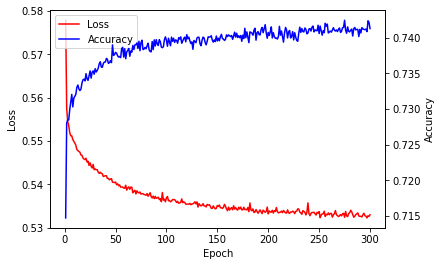

In [63]:
history_df = pd.DataFrame(fit_model_reduced_input.history,
                          index=range(1, len(fit_model_reduced_input.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="upper left")

plt.show()

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_reduced_input.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5981 - accuracy: 0.7273
Loss: 0.5980750322341919, Accuracy: 0.7273469567298889
